# Working in Plotly using an Airline Dataset

The Reporting Carrier On-Time Performance Dataset contains information on approximately 200 million domestic US flights reported to the United States Bureau of Transportation Statistics. The dataset contains basic information about each flight (such as date, time, departure airport, arrival airport) and, if applicable, the amount of time the flight was delayed and information about the reason for the delay. This dataset can be used to predict the likelihood of a flight arriving on time.

In [1]:
#import required packages

import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
import requests
import io
#!pip install kaleido #install kaleido package to render plot images as static images
import kaleido

In [2]:
# Read the airline data into pandas dataframe

#URL where the dataset is
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv'

#Fetch the CSV file from the URL
resp = requests.get(URL)

# Check if the request was successful
if resp.status_code == 200:
    # Read the content of the response as a bytes buffer
    buffer = io.BytesIO(resp.content)
    # Convert the bytes buffer to a pandas DataFrame
    airline_data =  pd.read_csv(buffer, encoding = "ISO-8859-1",
                                dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                       'Div2Airport': str, 'Div2TailNum': str})

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
#display the dataframe

airline_data.head()

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,1295781,1998,2,4,2,4,1998-04-02,AS,19930,AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1125375,2013,2,5,13,1,2013-05-13,EV,20366,EV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,118824,1993,3,9,25,6,1993-09-25,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,634825,1994,4,11,12,6,1994-11-12,HP,19991,HP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1888125,2017,3,8,17,4,2017-08-17,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#randomly sample 500 data points. I will set the random state to be 42 so that I have the same result.
data = airline_data.sample(n = 500, random_state = 42)

In [5]:
#take a look at the sampled dataframe
data.head()

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
5312,985989,2006,1,3,29,3,2006-03-29,OO,20304,OO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18357,1782939,1993,3,8,3,2,1993-08-03,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6428,84140,1989,3,7,3,1,1989-07-03,HP,19991,HP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15414,1839736,2008,4,10,10,5,2008-10-10,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10610,1622640,2010,1,2,19,5,2010-02-19,FL,20437,FL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Dimensions of the sampled dataframe
data.shape

(500, 110)

# 1. Scatter Plot

I will use a scatter plot to represent departure time changes with respect to airport distance.

The plot will contain:

- Title as Distance vs Departure Time.
- x-axis label should be Distance
- y-axis label should be DeptTime
- Distance column data from the flight delay dataset should be considered in x-axis
- DepTime column data from the flight delay dataset should be considered in y-axis
- Scatter plot markers should be of red color

In [7]:
#get x data
x = data['Distance']

#get y data
y = data['DepTime']

Using plotly.graph_objects

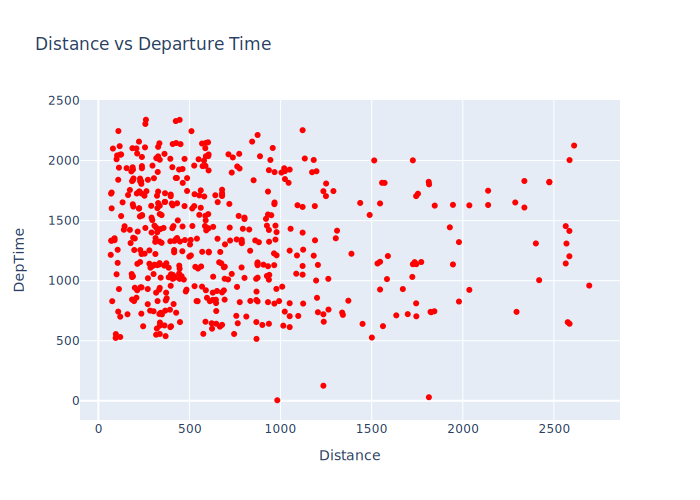

In [8]:
#create an empty figure using go.Figure()
fig = go.Figure()

#create a scatter plot by using the add_trace function and use the go.scatter() function within it
fig.add_trace(go.Scatter(x = x, y = y, mode = 'markers', marker = dict(color = 'red')))

#update the layout by adding title for the plot as well as labels
fig.update_layout(title = "Distance vs Departure Time",
                  xaxis_title = 'Distance', yaxis_title = 'DepTime')
#show the figure
fig.show(renderer="svg") #render image as static

Using ploty.express as go

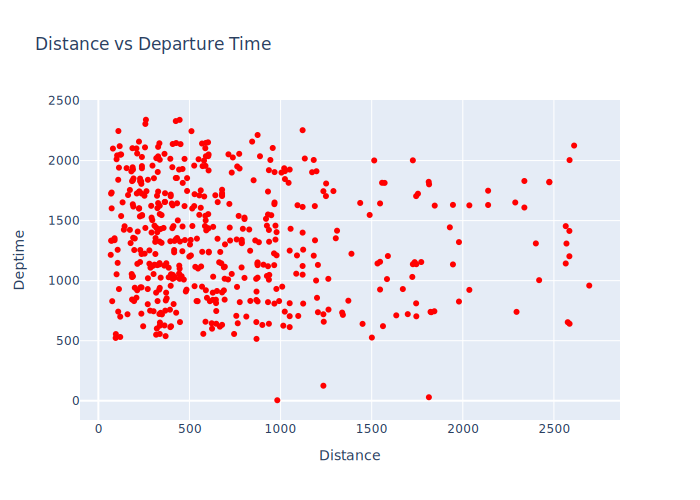

In [10]:
fig = px.scatter(x = x, y = y,
                 color_discrete_sequence = ['red'], #Specify the color here
                 title = "Distance vs Departure Time", #set title
                 labels = dict(x = 'Distance', y = "Deptime") #set labels
                ) 

#show the figure
fig.show(renderer="svg") #render image as static

# Inferences
It can be inferred that there are more flights round the clock for shorter distances. However, for longer distance there are limited flights through the day.

# 2. Line Plot

We will use a line plot to extract average monthly arrival delay time and see how it changes over the year.

This plot will contain the following

- Title as Month vs Average Flight Delay Time.
- x-axis label should be Month
- y-axis label should be ArrDelay
- A new dataframe line_data should be created which consists of 2 columns average arrival delay time per month and month from the dataset
- Month column data from the line_data dataframe should be considered in x-axis
- ArrDelay column data from the ine_data dataframeshould be considered in y-axis
- Plotted line in the line plot should be of green color

In [11]:
#grouping the data by Month and computing average over arrival delay time
line_data = data.groupby('Month')['ArrDelay'].mean().reset_index()

In [12]:
#display the data
line_data

,Month,ArrDelay
0,1,2.232558
1,2,2.687500
2,3,10.868421
3,4,6.229167
4,5,-0.279070
5,6,17.310345
6,7,5.088889
7,8,3.121951
8,9,9.081081
9,10,1.200000


In [13]:
#using plotly.graph_objects

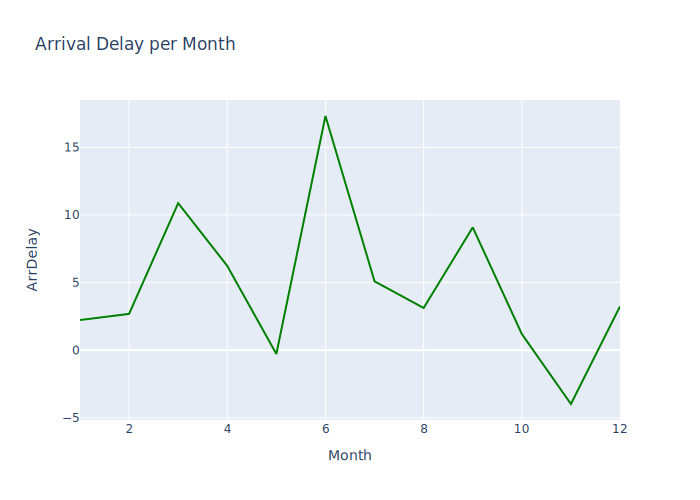

In [14]:
#create an empty figure using go.Figure()
fig = go.Figure()

#create a scatter plot by using the add_trace function and use the go.scatter() function within it
#we define the x axis, the y axis, and the mode as lines as well as the color as green
fig.add_trace(go.Scatter(x = line_data['Month'], y = line_data['ArrDelay'], mode = 'lines',
                         marker = dict(color = 'green')))

#update the layout by adding title for the plot as well as labels
fig.update_layout(title = "Arrival Delay per Month",
                  xaxis_title = 'Month', yaxis_title = 'ArrDelay')
#show the figure
fig.show(renderer = 'svg') #render image as static

Using plotly.express

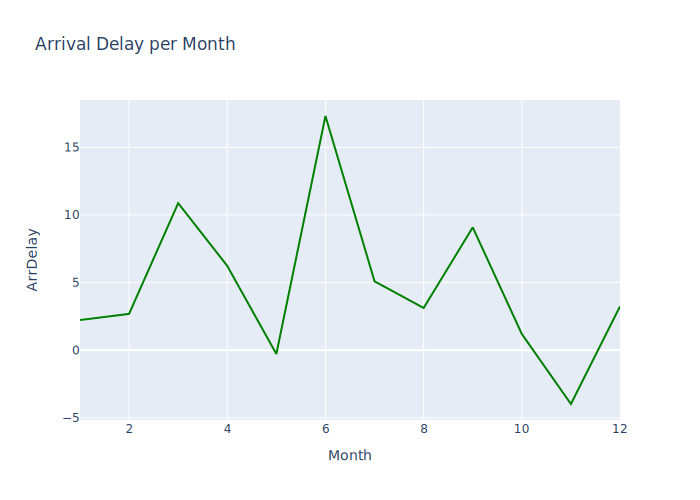

In [16]:
fig = px.line(x = line_data['Month'], y = line_data['ArrDelay'],
                 color_discrete_sequence = ['green'], #Specify the color here
                 title = "Arrival Delay per Month", #set title
                 labels = dict(x = 'Month', y = "ArrDelay") #set labels
                )

fig.show(renderer = 'svg') #render image as static

# Inferences

It seems that the lowest number of mean delayed arrivals occur during November.

# 3. Bar Chart

Let us use a bar chart to extract number of flights from a specific airline that goes to a destination

This plot should contain the following

- Title as Total number of flights to the destination state split by reporting air.
- x-axis label should be DestState
- y-axis label should be Flights
- Create a new dataframe called bar_data which contains 2 columns DestState and Flights.Here flights indicate total number of flights in each combination.

In [17]:
#Group the data by destination state and reporting airline and sum the flights for each airline
bar_data = data.groupby('DestState')['Flights'].sum().reset_index()

In [18]:
#view the data
bar_data

,DestState,Flights
0,AK,4.0
1,AL,3.0
2,AZ,8.0
3,CA,68.0
4,CO,20.0
5,CT,5.0
6,FL,32.0
7,GA,27.0
8,HI,5.0
9,IA,1.0


Using plotly.graph_objects

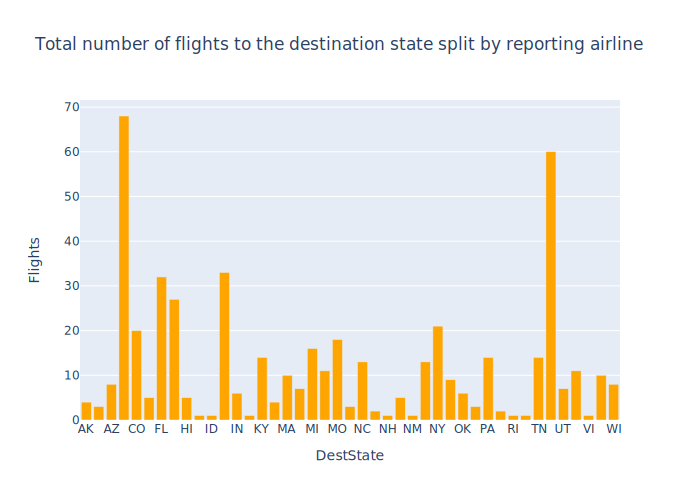

In [19]:
#create an empty figure
fig = go.Figure()

#create a bar plot by using the add_trace function and use the go.scatter() function within it
#we define the x axis, the y axis, and the color as orange
fig.add_trace(go.Bar(x = bar_data['DestState'], y = bar_data['Flights'],
                     marker = dict(color = 'orange')))

#update the layout by adding title for the plot as well as labels
fig.update_layout(title = "Total number of flights to the destination state split by reporting airline",
                  xaxis_title = 'DestState', yaxis_title = 'Flights')
#show the figure
fig.show(renderer = 'svg') #render image as static

Using plotly.express

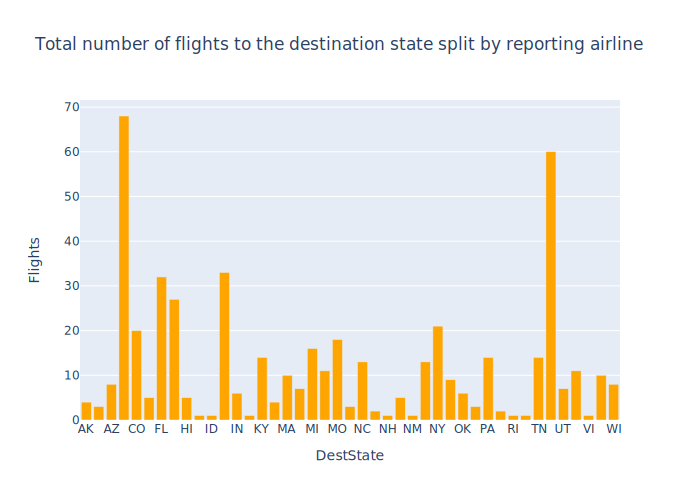

In [20]:
#create the plot
fig = px.bar(x = bar_data['DestState'], y = bar_data['Flights'],
                 color_discrete_sequence = ['orange'], #Specify the color here
                 title = "Total number of flights to the destination state split by reporting airline", #set title
                 labels = dict(x = 'DestState', y = "Flights") #set labels
                )

fig.show(renderer = "svg") #render image as static

In [21]:
print("The State with the most flights is: " + bar_data.loc[bar_data['Flights'] == bar_data['Flights'].max(), 'DestState'].values[0])
print(str(bar_data.loc[bar_data['DestState'] == 'CA', 'Flights'].values[0]) + " flights.")

The State with the most flights is: CA
68.0 flights.


# 4. Histogram

I will represent the distribution of arrival delay using a histogram.

As per the exercise, the plot will include:
- Title as Total number of flights to the destination state split by reporting air.
- x-axis label should be ArrayDelay
- y-axis will show the count of arrival delay

Using plotly.graph_objects

In [22]:
#checking possible missing values
data['ArrDelay'].isnull().sum()

15

In [23]:
#there are missing values, I will fill them with 0 and create a dataset for our histogram.
hist_data = data['ArrDelay'].fillna(0)

In [24]:
hist_data = pd.DataFrame(hist_data)

In [25]:
hist_data.columns

Index(['ArrDelay'], dtype='object')

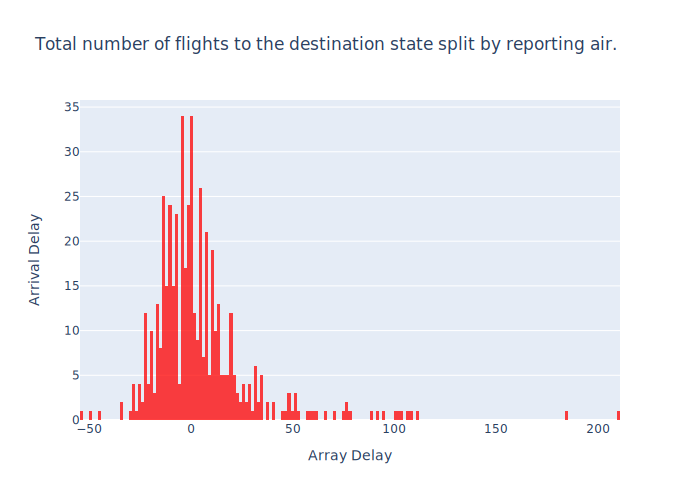

In [26]:
#create an empty figure
fig = go.Figure()

#create a histogram using the add_trace function and use the go.histogram() function within it
#we define the dataset, the x axis and the color of the histogram
fig.add_trace(go.Histogram(x = hist_data['ArrDelay'], marker = dict(color = 'red'),
                           opacity=0.75, # Adjust opacity for better visibility
                           xbins=dict(size=1.5)))  # Set the width of the bars

#update the layout by adding title for the plot as well as labels
fig.update_layout(title = "Total number of flights to the destination state split by reporting air.",
                  xaxis_title = 'Array Delay', yaxis_title = 'Arrival Delay')

#show the figure
fig.show(renderer = 'svg') #render image as static

Using plotly.express

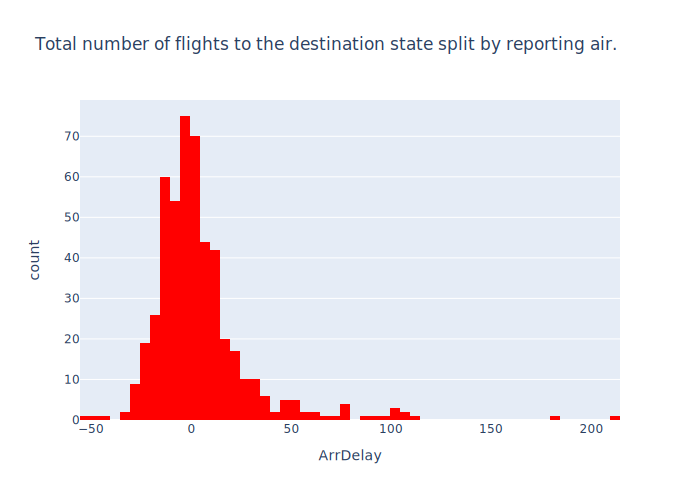

In [27]:
#create the plot
fig = px.histogram(hist_data, x = 'ArrDelay',
                   color_discrete_sequence = ['red'], #Specify the color here
                   title = "Total number of flights to the destination state split by reporting air.", #set title
                   labels = dict(x = 'Array Delay', y = "Arrival Delay") #set labels
                    )
#show the plot
fig.show(renderer = 'svg') #render image as static

# 5. Bubble Chart

I will use a bubble chart to represent the number of flights as per reporting airline

This plot will contain the following

- Title as Reporting Airline vs Number of Flights.
- x-axis label will be Reporting_Airline
- y-axis label will be Flights
- size of the bubble will be Flights indicating number of flights
- Name of the hover tooltip to reporting_airline using hover_name parameter.

Using plotly.graph_objects

In [28]:
# Grouping the data by reporting airline and get number of flights
bub_data = data.groupby('Reporting_Airline')['Flights'].sum().reset_index()

In [29]:
#show the data
bub_data

,Reporting_Airline,Flights
0,9E,5.0
1,AA,57.0
2,AS,14.0
3,B6,10.0
4,CO,12.0
5,DL,66.0
6,EA,4.0
7,EV,11.0
8,F9,4.0
9,FL,3.0


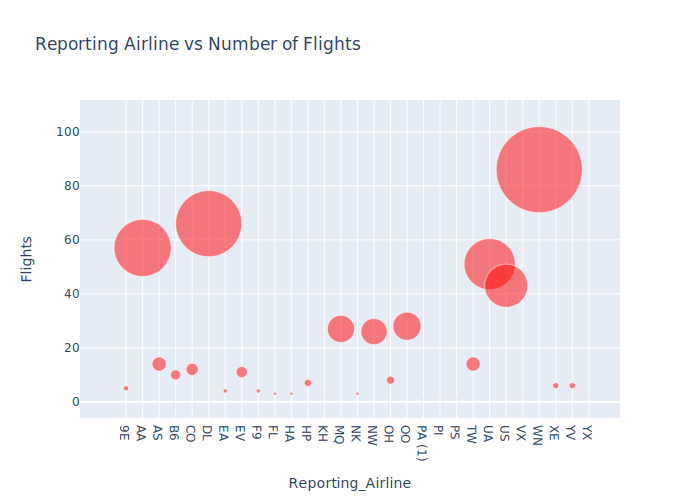

In [30]:
#create an empty figure
fig = go.Figure()

#create a scatter plot using the add_trace function and use the go.Scatter() function within it
#we define the dataset, the x and y axis, the size of the points as well as a hover name.
fig.add_trace(go.Scatter(x=bub_data['Reporting_Airline'],
                         y=bub_data['Flights'],
                         mode = 'markers',marker = dict(size = bub_data['Flights'],
                                                       color = 'red',
                                                       opacity = 0.5),
                        text = bub_data['Reporting_Airline'], # Text for hover tooltips
                        hoverinfo = 'text'## Show only the specified text in the hover tooltip
                        ))

#update the layout by adding title for the plot as well as labels
fig.update_layout(title = "Reporting Airline vs Number of Flights",
                  xaxis_title = 'Reporting_Airline', yaxis_title = 'Flights')

#show the figure
fig.show(renderer = 'svg') #render image as static

Using plotly.express

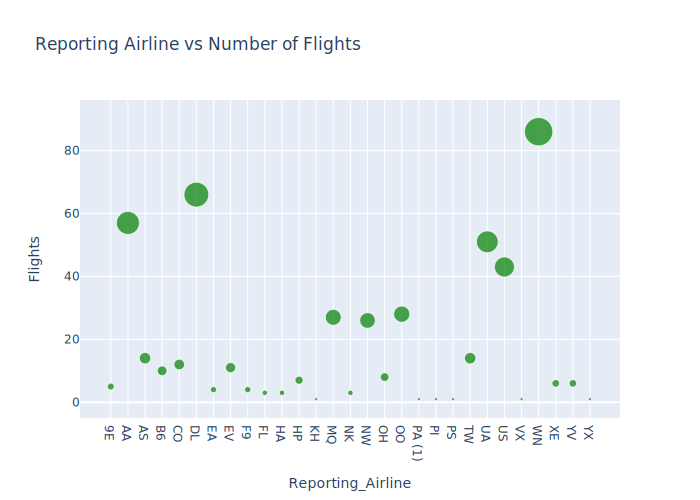

In [31]:
#bubble chart using px.scatter function with x ,y and size varibles defined.Title defined as Reporting Airline vs Number of Flights
fig = px.scatter(bub_data, x = 'Reporting_Airline', y = 'Flights',
                 color_discrete_sequence = ['green'],
                 size = 'Flights',
                 hover_name = 'Reporting_Airline',
                 title = 'Reporting Airline vs Number of Flights')
#show the figure
fig.show(renderer = 'svg') #render image as static

# 6. Pie Chart

Using plotly.graph_objects

I will represent the proportion of Flights by Distance Group (Flights indicated by numbers)

As per the exercise, this plot should contain the following

- Title as Flight propotion by Distance Group.
- values should be Flights
- names should be DistanceGroup

In [32]:
#grouping data by distance group and summing flights per distance group
pie_data = data.groupby('DistanceGroup')['Flights'].sum().reset_index()

In [33]:
#show the data
pie_data

,DistanceGroup,Flights
0,1,90.0
1,2,136.0
2,3,91.0
3,4,69.0
4,5,42.0
5,6,14.0
6,7,22.0
7,8,14.0
8,9,4.0
9,10,8.0


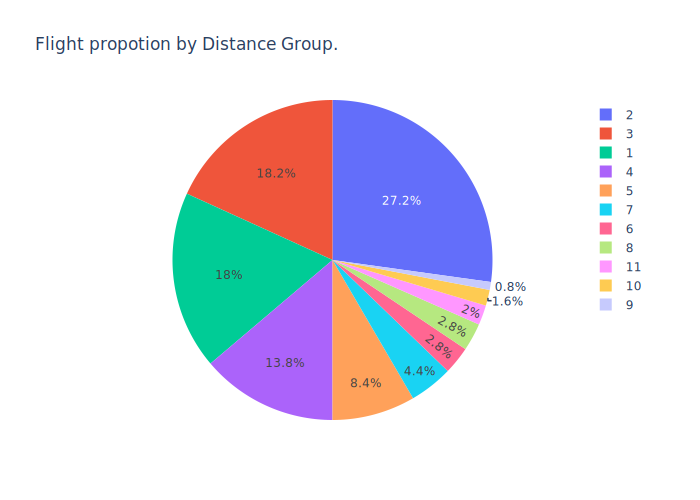

In [34]:
#create an empty figure
fig = go.Figure()

#create a pie plot using the add_trace function and use the go.Pie() function within it
#we labels and values of the chart
fig.add_trace(go.Pie(labels=pie_data['DistanceGroup'], values= pie_data['Flights']))

# Customize layout
fig.update_layout(
    title='Flight propotion by Distance Group.'
)
              
#show the figure
fig.show(renderer = 'svg') #render image as static

Using plotly.express

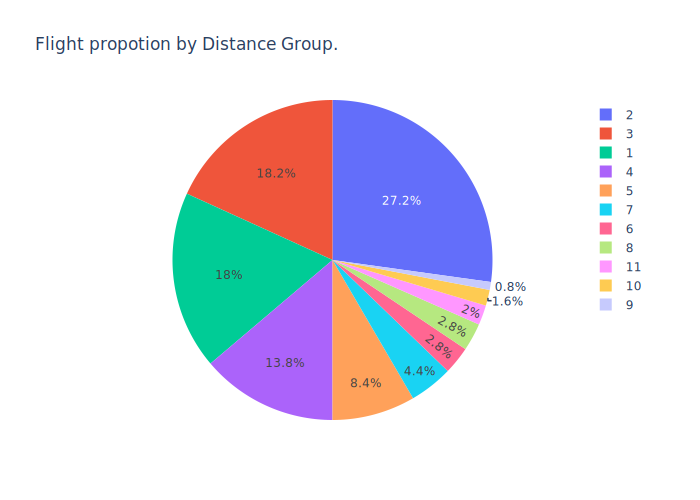

In [35]:
# Using px.pie function to create the chart.
# Values parameter will be set from flights column.
# labels for the distance group are passed to the `names` parameter.
fig = px.pie(values= pie_data['Flights'], names = pie_data['DistanceGroup'],
             title='Flight propotion by Distance Group.')

#show the figure
fig.show(renderer = 'svg') #render image as static

Inferences

Distance Group 2 has the highsest proportion of flights by 27.2%

# 7. Sunburst Chart

As per the exercise, I will represent the hierarchical view in othe order of month and destination state holding value of number of flight
This plot will contain the following

- Hierarchy of sectors from root to leaves in path parameter. Here, we go from Month to DestStateName feature.
- Setting sector values in values parameter. Here, we can pass in Flights feature.
- Showing the figure.
- Title as Flight Distribution Hierarchy

In [36]:
#using plotly.express

In [37]:
data_sunburst = data[['Month', 'DestStateName', 'Flights']]

In [38]:
#see the data
data_sunburst

,Month,DestStateName,Flights
5312,3,Wisconsin,1.0
18357,8,Georgia,1.0
6428,7,Nebraska,1.0
15414,10,Illinois,1.0
10610,2,Indiana,1.0
...,...,...,...
18946,7,Missouri,1.0
16291,6,Nevada,1.0
21818,3,Missouri,1.0
24116,4,Florida,1.0


In [39]:
#reset index
data_sunburst.reset_index(inplace = True)

In [40]:
#remove index column
data_sunburst.drop(['index'], axis = 1, inplace = True)


/var/folders/8q/cny955gd2434t_z_4ls5f2l40000gn/T/ipykernel_34503/3476522461.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
#see again the data frame
data_sunburst

,Month,DestStateName,Flights
0,3,Wisconsin,1.0
1,8,Georgia,1.0
2,7,Nebraska,1.0
3,10,Illinois,1.0
4,2,Indiana,1.0
...,...,...,...
495,7,Missouri,1.0
496,6,Nevada,1.0
497,3,Missouri,1.0
498,4,Florida,1.0


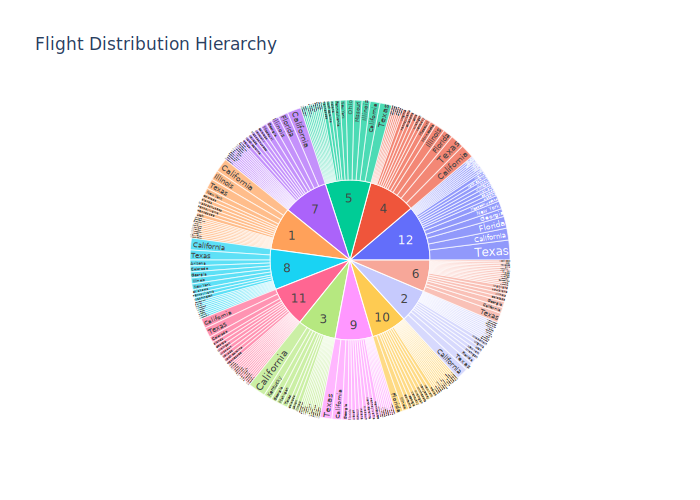

In [42]:
## Define path as Month and DestStateName and values as Flights.
fig = px.sunburst(data_sunburst, path=['Month', 'DestStateName'], values='Flights',title='Flight Distribution Hierarchy')
fig.show(renderer = 'svg') #render image as static

Inferences

Here the Month numbers present in the innermost concentric circle is the root and for each month we will check the number of flights for the different destination states under it.